In [1]:
import torch
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


In [2]:
import torch.nn as nn

In [3]:
class Flatten(nn.Module):
  def forward(self, input):
    return input.view(input.size(0), -1)

In [4]:
class UnFlatten(nn.Module):
  def forward(self, input, size=1024):
    return input.view(input.size(0), size, 1, 1)

In [5]:
class autoencoder(nn.Module):
  def __init__(self,i=1024,o=64):
    super(autoencoder, self).__init__()
    self.encoder = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=2, stride=2),
      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(32, 64, kernel_size=2, stride=2),
      nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(64, 128, kernel_size=2, stride=2),
      nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(128, 256, kernel_size=2, stride=2),
      nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(256, 512, kernel_size=2, stride=2),
      nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(512, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(1024, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      Flatten(),
      nn.Linear(in_features=i, out_features=o),
    )
    self.decoder = nn.Sequential(
      nn.Linear(in_features=o, out_features=i),
      UnFlatten(),
      nn.ConvTranspose2d(1024, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2),
      nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
      nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
      nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
      nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(32, 3, kernel_size=2, stride=2),
      nn.BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.Sigmoid(),
    )

  def forward(self, x):
      x = self.encoder(x)
      x = self.decoder(x)
      return x

In [6]:
model=autoencoder()
model.to(device)
print(model)

autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 512, kernel_size=(2, 2), stride=(2, 2))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Conv2d(512, 1024, kernel_size=(2, 2), stride=(2, 2))
    (16): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, t

In [7]:
from torchsummary import summary
summary(model,(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             416
       BatchNorm2d-2           [-1, 32, 64, 64]              64
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 32, 32]           8,256
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 16, 16]          32,896
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
           Conv2d-10            [-1, 256, 8, 8]         131,328
      BatchNorm2d-11            [-1, 256, 8, 8]             512
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 512, 4, 4]         524,800
      BatchNorm2d-14            [-1, 51

In [8]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

#Connect to Google drive

In [9]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [10]:
from torchvision import transforms
transformer = transforms.Compose([
  transforms.Resize((128, 128)),       
  transforms.ToTensor(),                     
  transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] )])

In [11]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/Image folders/train", transform = transformer)

In [12]:
import torch.utils.data as Data
loader = Data.DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True)

#Try to send one batch of training images to AE

In [13]:
for batchX, _ in loader:
  break;
print(batchX.shape)

torch.Size([16, 3, 128, 128])


In [14]:
tensorY=model(batchX.to(device))
print(tensorY.shape)

torch.Size([16, 3, 128, 128])


In [15]:
loss = loss_func(tensorY, batchX.to(device))
print(loss)

tensor(0.6961, device='cuda:0', grad_fn=<MseLossBackward>)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [17]:
def ConvertTensorToArray (tensorInput):
  imgTensor = torchvision.utils.make_grid(tensorInput)
  imgArray = imgTensor.numpy() 
  imgArray1 = np.zeros((imgArray.shape[1], imgArray.shape[2], 3))
  imgArray1[:,:,0] = imgArray[0, :, :]  
  imgArray1[:,:,1] = imgArray[1, :, :]
  imgArray1[:,:,2] = imgArray[2, :, :]
  imgArray1 = imgArray1*0.5+0.5
  return imgArray1

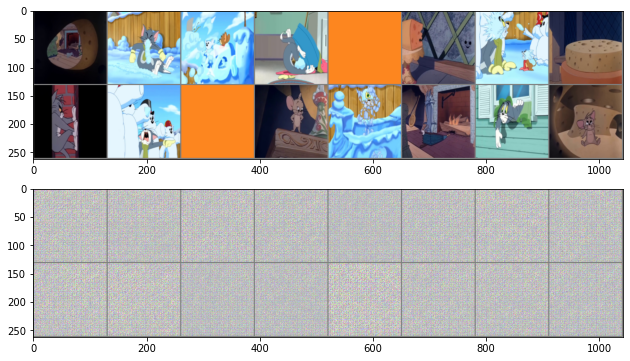

In [18]:
#compare Input vs Output
fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX) 
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu()) 
axs[1].imshow(imgArray)
plt.show()

#Training loop

In [19]:
lossLst = []
for epoch in range(200):
  if(epoch%5==0):
    print("\nepoch = ", epoch, end = ", ")
    print("batch: ", end="")
  for step, (batchX, _) in enumerate(loader):
    if(epoch%5==0 and step%5==0):
      print(step, end = ",")
    tensorY = model(batchX.to(device))
    loss = loss_func(tensorY, batchX.to(device))
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch =  0, batch: 0,5,10,15,
epoch =  5, batch: 0,5,10,15,
epoch =  10, batch: 0,5,10,15,
epoch =  15, batch: 0,5,10,15,
epoch =  20, batch: 0,5,10,15,
epoch =  25, batch: 0,5,10,15,
epoch =  30, batch: 0,5,10,15,
epoch =  35, batch: 0,5,10,15,
epoch =  40, batch: 0,5,10,15,
epoch =  45, batch: 0,5,10,15,
epoch =  50, batch: 0,5,10,15,
epoch =  55, batch: 0,5,10,15,
epoch =  60, batch: 0,5,10,15,
epoch =  65, batch: 0,5,10,15,
epoch =  70, batch: 0,5,10,15,
epoch =  75, batch: 0,5,10,15,
epoch =  80, batch: 0,5,10,15,
epoch =  85, batch: 0,5,10,15,
epoch =  90, batch: 0,5,10,15,
epoch =  95, batch: 0,5,10,15,
epoch =  100, batch: 0,5,10,15,
epoch =  105, batch: 0,5,10,15,
epoch =  110, batch: 0,5,10,15,
epoch =  115, batch: 0,5,10,15,
epoch =  120, batch: 0,5,10,15,
epoch =  125, batch: 0,5,10,15,
epoch =  130, batch: 0,5,10,15,
epoch =  135, batch: 0,5,10,15,
epoch =  140, batch: 0,5,10,15,
epoch =  145, batch: 0,5,10,15,
epoch =  150, batch: 0,5,10,15,
epoch =  155, batch: 0,5,10,1

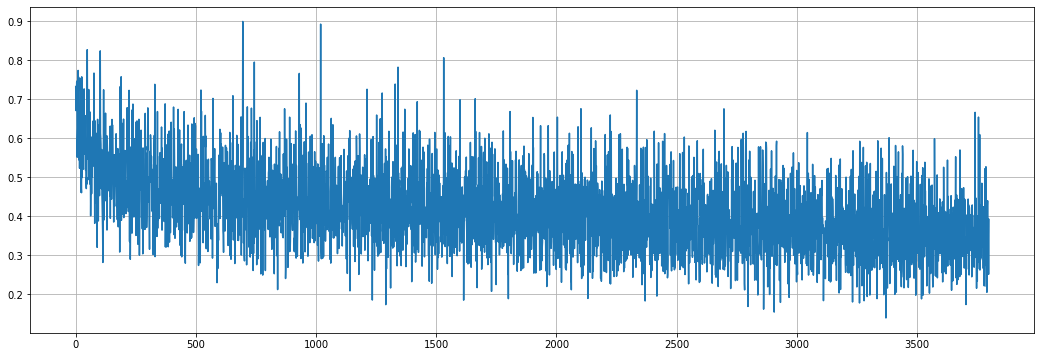

In [20]:
fig=plt.figure(figsize=(18, 6))
plt.plot(lossLst)
plt.grid()

#Test with training data

In [21]:
model.eval()
print("")

In [22]:
for batchX, _ in loader:
  break;
print(batchX.shape)

torch.Size([16, 3, 128, 128])


In [23]:
tensorY=model(batchX.to(device))
print(tensorY.shape)

torch.Size([16, 3, 128, 128])


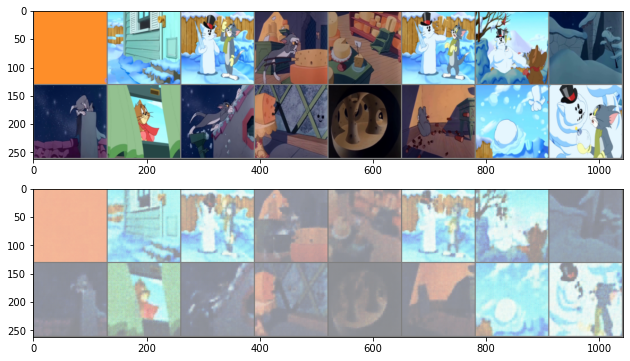

In [24]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX) 
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu()) 
axs[1].imshow(imgArray)
plt.show()

#Test with un-seen test data

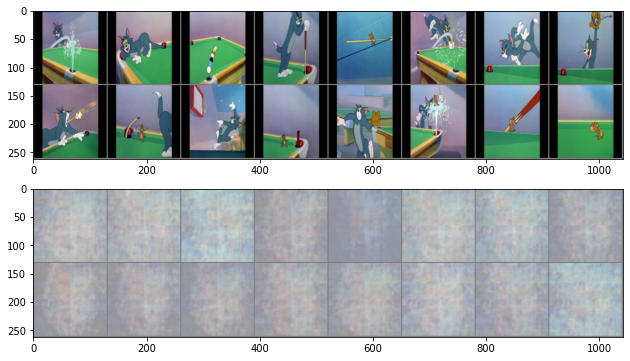

In [25]:
test_dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/Image folders/test", transform = transformer)
loader = Data.DataLoader(
    dataset=test_dataset,
    batch_size=16,
    shuffle=True)
for batchX, _ in loader:
  break;
tensorY=model(batchX.to(device))

fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX) 
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu()) 
axs[1].imshow(imgArray)
plt.show()